# Отток клиентов

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Преобразование-категориальных-признаков" data-toc-modified-id="Преобразование-категориальных-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование категориальных признаков</a></span></li><li><span><a href="#Создание-обучающей-и-валидационнных-выборок" data-toc-modified-id="Создание-обучающей-и-валидационнных-выборок-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создание обучающей и валидационнных выборок</a></span></li><li><span><a href="#Нормиромание-количественных-признаков" data-toc-modified-id="Нормиромание-количественных-признаков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Нормиромание количественных признаков</a></span></li></ul></li><li><span><a href="#Обучение-моделей-без-учета-дисбаланса" data-toc-modified-id="Обучение-моделей-без-учета-дисбаланса-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей без учета дисбаланса</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Попробуем-указать-гиперпараметр-class_weight:-'balanced'" data-toc-modified-id="Попробуем-указать-гиперпараметр-class_weight:-'balanced'-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Попробуем указать гиперпараметр <code>class_weight: 'balanced'</code></a></span></li><li><span><a href="#Теперь-применим-технику-upsampling'a" data-toc-modified-id="Теперь-применим-технику-upsampling'a-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Теперь применим технику upsampling'a</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Признаки
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — количество недвижимости у клиента
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак
* Exited — факт ухода клиента

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


В признаке `Tensure` ~ 10% пропусков. Слишком большое число, чтобы просто избавиться от этих строк, заполню их нулями, считая, что не указанное количество недвижимости означает её отстуствие.

In [ ]:
data['Tenure'].fillna(0, inplace=True)

С остальными данными всё впорядке. Теперь нужно избавиться от лишних признаков: `RowNumber`, `CustomerId` и `Surname`.

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


## Исследование задачи

0    0.7963
1    0.2037
Name: Exited, dtype: float64

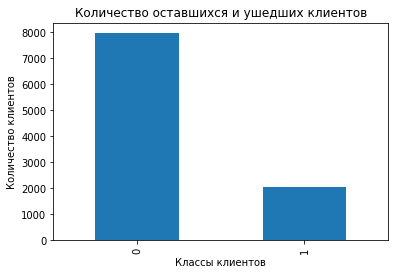

In [8]:
data['Exited'].value_counts().plot(kind='bar')
plt.title('Количество оставшихся и ушедших клиентов')
plt.xlabel('Классы клиентов')
plt.ylabel('Количество клиентов');
data['Exited'].value_counts() / data['Exited'].count()

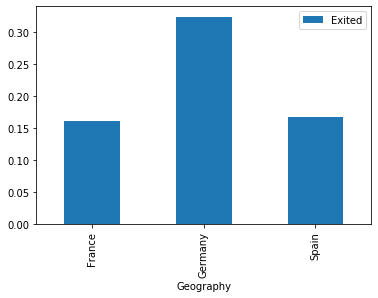

In [9]:
data.pivot_table(index='Geography', values=['Exited'], aggfunc='mean').plot(kind='bar')

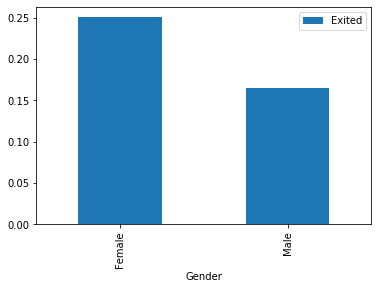

In [10]:
data.pivot_table(index='Gender', values=['Exited'], aggfunc='mean').plot(kind='bar')

### Преобразование категориальных признаков

In [11]:
data_dummies = pd.get_dummies(data, drop_first=True)

### Создание обучающей и валидационнных выборок

In [14]:
features = data_dummies.drop(['Exited'], axis=1)
target = data_dummies['Exited']
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

### Нормиромание количественных признаков

In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [13]:
numeric = ['CreditScore', 'Balance', 'EstimatedSalary']
scaler = StandardScaler() 
features_train[numeric] = scaler.fit_transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

## Обучение моделей без учета дисбаланса

In [15]:
def test_method(estimator, param_grid, train, valid):
    """
    Перебор параметров по сетке и кросс-валидация
    Значение лучшей модели на обучающей и валидационной выборках
    Построение ROC-кривой
    """
    features_train, target_train = train
    features_valid, target_valid = valid
    clf = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1, scoring='f1')
    best = clf.fit(features_train, target_train)
    print('Params:', clf.best_params_)
    print('Best train score:', clf.best_score_)
    print('Best valid score:', best.score(features_valid, target_valid))
    print('ROC-AUC score:', roc_auc_score(target_valid, best.predict_proba(features_valid)[:,1]))
    fpr, tpr, thresholds = roc_curve(target_valid, best.predict_proba(features_valid)[:,1])
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.xlim((0, 1))
    plt.ylim((0, 1))

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    
    return best.best_estimator_

### Logistic Regression

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s


Params: {'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}
Best train score: 0.3219498475113237
Best valid score: 0.2928870292887029
ROC-AUC score: 0.7584162088892058


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.8s finished


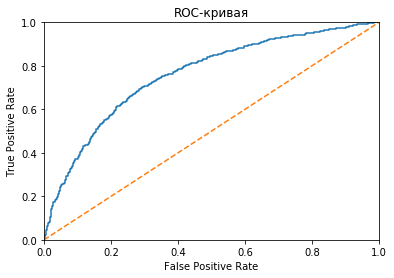

In [16]:
train = [features_train, target_train]
valid = [features_valid, target_valid]

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
}
model = test_method(LogisticRegression(), param_grid, train, valid)

Лучший показатель f1_score для логистической регрессии равен `0.2928`

### Random Forest Classifier

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.5min finished


Params: {'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 8, 'n_estimators': 100}
Best train score: 0.572687816522561
Best valid score: 0.5737898465171193
ROC-AUC score: 0.85836959882048


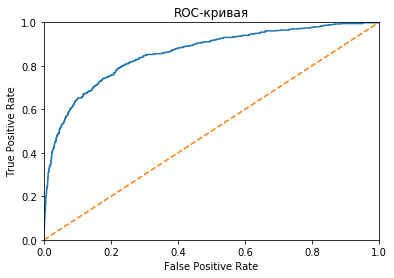

In [17]:
param_grid = {
    'n_estimators': [100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4, 20, 2),
    'min_samples_split': np.arange(2, 12, 2)
}
rfc_model = test_method(RandomForestClassifier(), param_grid, train, valid)

Лучший показатель f1_score случайного леса равен `0.5737`

### Вывод

Классы в выборке находятся в отношении 4:1, что говорит о сильном дисбалансе.    
Логистическая регрессия сработала совсем плохо. Значительно лучше показал себя случайный лес.    
ROC-AUC метрика также значительно лучше у случайного леса и является удовлетворительной.

## Борьба с дисбалансом

### Попробуем указать гиперпараметр `class_weight: 'balanced'`

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 177 out of 200 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.8s finished


Params: {'C': 4.281332398719396, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best train score: 0.4861239238092406
Best valid score: 0.5077441077441077
ROC-AUC score: 0.7634139497277115


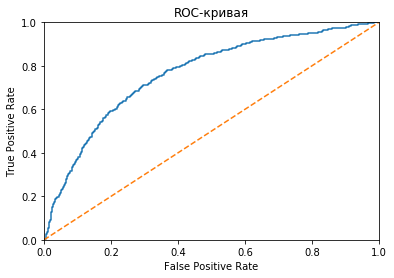

In [18]:
logreg_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}
model = test_method(LogisticRegression(), logreg_param_grid, train, valid)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.5min finished


Params: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 8, 'n_estimators': 500}
Best train score: 0.6208371999320349
Best valid score: 0.6384615384615385
ROC-AUC score: 0.864420822334784


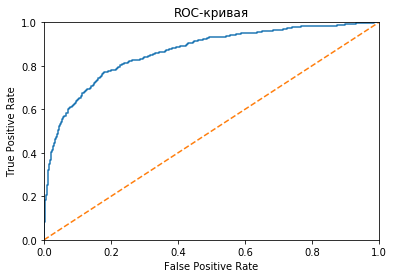

In [19]:
rfc_param_grid = {
    'n_estimators': [100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4, 20, 2),
    'min_samples_split': np.arange(2, 12, 2),
    'class_weight': ['balanced']
}
rfc_model = test_method(RandomForestClassifier(), rfc_param_grid, train, valid)

Показатель f1_меры значительно вырос, особенно это заметно на модели логистической регрессии. Метрика ROC-AUC практически не изменилась на обеих моделях.

### Теперь применим технику upsampling'a

In [20]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 177 out of 200 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished


Params: {'C': 0.03359818286283781, 'penalty': 'l1', 'solver': 'liblinear'}
Best train score: 0.7021630046884316
Best valid score: 0.5066666666666667
ROC-AUC score: 0.7629925566573923


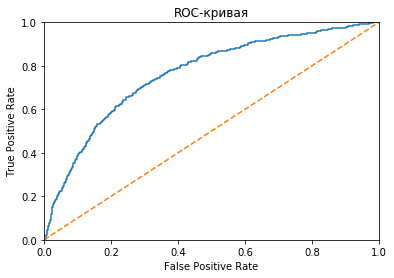

In [21]:
logreg_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}
model = test_method(LogisticRegression(), logreg_param_grid, [*upsample(features_train, target_train, 4)], valid)

F1_мера на валидационной выборке не увеличилась по сравнению с использованием гиперпараметра `class_weight`, но теперь мы наблюдаем значительную переобученность. 

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  3.5min finished


Params: {'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 2, 'n_estimators': 500}
Best train score: 0.9575097854885685
Best valid score: 0.6120331950207468
ROC-AUC score: 0.8539073981593779


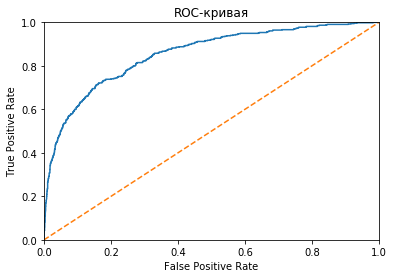

In [22]:
rfc_param_grid = {
    'n_estimators': [100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4, 20, 2),
    'min_samples_split': np.arange(2, 12, 2)
}
rfc_model = test_method(RandomForestClassifier(), rfc_param_grid,  [*upsample(features_train, target_train, 4)], valid)

Показатели ухудишилсь и появилась огромная переобученность.

### Вывод

Лучшей стратегией по устранению дисбаланса будет применение гиперпараметра `class_weight` со значением `balanced`.

## Тестирование модели

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   53.3s finished


Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 512, 'random_state': 12345}
Best train score: 0.6165690102298562
Best valid score: 0.6397058823529411
ROC-AUC score: 0.8649287769613089


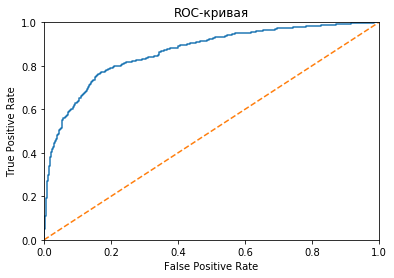

In [24]:
rfc_param_grid = {
    'n_estimators': np.arange(480, 520, 1),
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_split': [2],
    'class_weight': ['balanced'],
    'random_state': [12345]
}
rfc_model = test_method(RandomForestClassifier(), rfc_param_grid,  train, valid)

### Вывод

Лучшей моделью оказался `RandomForestClassifier`:
* F1_score = 0.6397;
* ROC-AUC = 0.8649.

Для балансировки классов был использован гиперпараметр `class_weight: 'balanced'` и параметр `stratify=True` для метода `train_test_split()`.    
Использование подхода upscaling'a привело к сильному переобучению.